<a href="https://colab.research.google.com/github/SushmaRajagopal/Text-Summarization-Comparitive-Study/blob/main/TEXTSUM_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets
!pip install transformers
!pip install rouge
!pip install sentencepiece
!pip install torch
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.2 MB/s eta 0:00:00


In [ ]:
pip install sacrebleu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install transformers[sentencepiece] datasets sacrebleu rouge_score py7zr -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.3 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline, set_seed

import matplotlib.pyplot as plt

import pandas as pd
from datasets import load_dataset, load_metric
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", version="3.0.0")

print(f"Features in cnn_dailymail : {dataset['train'].column_names}")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Features in cnn_dailymail : ['article', 'highlights', 'id']


In [ ]:
sample = dataset["train"][1]
print(f"""
Article (excerpt of 500 characters, total length: {len(sample["article"])}):
""")
print(sample["article"][:500])
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])


Article (excerpt of 500 characters, total length: 4051):

Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most s

Summary (length: 281):
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .


-------------------

## Text Summarization Pipelines


In [ ]:
sample_text = dataset["train"][1]["article"][:1000]

# We'll collect the generated summaries of each model in a dictionary
summaries = {}

### Summarization Baseline


In [ ]:
def baseline_summary_three_sent(text):
    return "\n".join(sent_tokenize(text)[:3])

In [ ]:
summaries['baseline'] = baseline_summary_three_sent(sample_text)

summaries['baseline']

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.\nHere, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.\nMIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."'

#GPT-2
# 355 million parameters

In [ ]:
from transformers import pipeline, set_seed

set_seed(42)

pipe = pipeline('text-generation', model = 'gpt2-medium' )

gpt2_query = sample_text + "\nTL;DR:\n"

pipe_out = pipe(gpt2_query, max_length = 512, clean_up_tokenization_spaces = True)




Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
pipe_out

[{'generated_text': 'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and

In [ ]:
pipe_out[0]["generated_text"][len(gpt2_query) :]

'The Eighth Amendment of the U.S. Constitution protects citizens from unreasonable search & seizure. This is what Leifman said in a 2012 hearing before Florida\'s Florida Supreme Court when questioned by judge Patricia Smith to address the problem of mentally ill people being arrested by police. That hearing occurred three months after a local judge in Miami ordered the state of Florida to stop using police officers as stand-by for all mentally ill people, something the U.S. Supreme Court ruled as unconstitutional a month before. "I think I\'ve made it clear that the Fourth Amendment prohibits police officers from using non-law enforcement officers," Leifman said. "And I believe in common law -- and I\'m proud of this fact -- in common law, it is unlawful for police officers to serve as stand-bys for a mentally ill person." He noted that the Fourth Amendment was intended to stop a person suffering involuntary manslaughter when his or her own death threatened to occur as a result of the

In [ ]:
summaries['gpt2'] = "\n".join(sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :]))

#T5
#220 million

In [ ]:
pipe = pipeline('summarization', model = 't5-small' )

pipe_out = pipe(sample_text)

In [ ]:
pipe_out

[{'summary_text': "inmates with the most severe mental illnesses are incarcerated until they're ready to appear in court . most often, they face drug charges or charges of assaulting an officer . mentally ill people become more paranoid, delusional, and less likely to follow dir ."}]

In [ ]:
summaries['t5'] = 'n'.join(sent_tokenize(pipe_out[0]['summary_text']))

#BART
#140 million

In [ ]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn")
pipe_out = pipe(sample_text)


In [ ]:
pipe_out

[{'summary_text': 'Miami-Dade pretrial detention facility is dubbed the "forgotten floor" Here, inmates with the most severe mental illnesses are incarcerated. Most often, they face drug charges or charges of assaulting an officer. Judge Steven Leifman says the arrests often result from confrontations with police.'}]

In [ ]:
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

In [ ]:
summaries["bart"]

'Miami-Dade pretrial detention facility is dubbed the "forgotten floor" Here, inmates with the most severe mental illnesses are incarcerated.\nMost often, they face drug charges or charges of assaulting an officer.\nJudge Steven Leifman says the arrests often result from confrontations with police.'

# PEGASUS
#568 million



In [ ]:
pipe = pipeline('summarization', model="google/pegasus-cnn_dailymail"  )

pipe_out = pipe(sample_text)

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
pipe_out

[{'summary_text': 'Mentally ill inmates are housed on the "forgotten floor" of a Miami jail .<n>Judge Steven Leifman says the charges are usually "avoidable felonies"<n>He says the arrests often result from confrontations with police .<n>Mentally ill people often won\'t do what they\'re told when police arrive on the scene .'}]

In [ ]:
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

In [ ]:
## Comparing Different Summaries

In [ ]:
print("GROUND TRUTH")

print(dataset['train'][1]['highlights'])


for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])


GROUND TRUTH
Mentally ill inmates in Miami are housed on the "forgotten floor"
Judge Steven Leifman says most are there as a result of "avoidable felonies"
While CNN tours facility, patient shouts: "I am the son of the president"
Leifman says the system is unjust and he's fighting for change .
BASELINE
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events.
Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial.
MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor."
GPT2
The Eighth Amendment of the U.S. Constitution protects citizens from unreasonable search & seizure.
This is what Leifman said in a 2012 hearing before Florida's Florida Supreme Court when questioned by judge Patricia Smi


# SacreBLEU



In [ ]:

from datasets import load_metric

bleu_metric = load_metric("sacrebleu")

<ipython-input-27-eacc06f6d0e4>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  bleu_metric = load_metric("sacrebleu")


In [ ]:
bleu_metric.add(prediction = [summaries["pegasus"]], reference = [dataset['train'][1]['highlights'] ])

results = bleu_metric.compute(smooth_method = 'floor', smooth_value = 0 )

results['precision'] = [np.round(p , 2) for p in results['precisions'] ]

pd.DataFrame.from_dict(results, orient = 'index', columns = ['Value'] )

,Value
score,18.73841
counts,"[27, 14, 10, 6]"
totals,"[67, 66, 65, 64]"
precisions,"[40.298507462686565, 21.21212121212121, 15.384..."
bp,1.0
sys_len,67
ref_len,57
precision,"[40.3, 21.21, 15.38, 9.38]"


Bleu matrix has drawbacks as it doesn't consider the meaning of the sentence or the similarity between sentence so we use the rouge matrix

# ROUGE



In [ ]:
rouge_metric = load_metric('rouge')

## ROUGE-N and ROUGE-L




In [ ]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

reference = dataset['train'][1]['highlights']

records = []

for model_name in summaries:
    rouge_metric.add(prediction = summaries[model_name], reference = reference )
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )
    print('rouge_dict ', rouge_dict )
    records.append(rouge_dict)

pd.DataFrame.from_records(records, index = summaries.keys() )

rouge_dict  {'rouge1': 0.365079365079365, 'rouge2': 0.14516129032258066, 'rougeL': 0.20634920634920634, 'rougeLsum': 0.2857142857142857}
rouge_dict  {'rouge1': 0.16666666666666666, 'rouge2': 0.043795620437956206, 'rougeL': 0.11594202898550726, 'rougeLsum': 0.15217391304347824}
rouge_dict  {'rouge1': 0.1758241758241758, 'rouge2': 0.0, 'rougeL': 0.13186813186813187, 'rougeLsum': 0.15384615384615383}
rouge_dict  {'rouge1': 0.3655913978494624, 'rouge2': 0.13186813186813184, 'rougeL': 0.2150537634408602, 'rougeLsum': 0.3225806451612903}
rouge_dict  {'rouge1': 0.5, 'rouge2': 0.24489795918367346, 'rougeL': 0.36000000000000004, 'rougeLsum': 0.46}


,rouge1,rouge2,rougeL,rougeLsum
baseline,0.365079,0.145161,0.206349,0.285714
gpt2,0.166667,0.043796,0.115942,0.152174
t5,0.175824,0.000000,0.131868,0.153846
bart,0.365591,0.131868,0.215054,0.322581
pegasus,0.500000,0.244898,0.360000,0.460000


# Evaluationg on the TEST set of the CNN/DailyMail Dataset

In [ ]:
def calculate_metric_on_baseline_test_ds(dataset, metric, column_text = 'article', column_summary = 'highlights' ):
    """
    This function calculates a specified metric on a baseline test dataset for a Natural Language Processing (NLP) task.
    It assumes the task is a text summarization task, where the goal is to generate a summary (e.g., highlights) from a text (e.g., article).

    Parameters:
    dataset (pandas.DataFrame): The test dataset. It should contain a column for the text and a column for the true summary.
    metric (datasets.Metric): The metric to calculate. This should be a metric object from the Hugging Face datasets library.
    column_text (str, optional): The name of the column in the dataset that contains the text. Defaults to 'article'.
    column_summary (str, optional): The name of the column in the dataset that contains the true summary. Defaults to 'highlights'.

    Returns:
    score (float): The calculated score of the metric on the test dataset.
    """
    summaries = [baseline_summary_three_sent(text) for text in dataset[column_text] ]

    metric.add_batch(predictions = summaries, references = dataset[column_summary] )

    score = metric.compute()
    return score

In [ ]:
test_sampled = dataset['train'].shuffle(seed = 42).select(range(1000))

score = calculate_metric_on_baseline_test_ds(test_sampled, rouge_metric )

rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame.from_dict(rouge_dict, orient = 'index' , columns = ['baseline'] ).T

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.253995,0.100642,0.165754,0.231571


## Strategy to calculate the ROUGE Metric on test dataset for the other Models

In [ ]:
from tqdm import tqdm
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements.

    Generator function to yield successive batch-sized chunks from list_of_elements.

    Parameters:
    list_of_elements (list): List of elements to be divided into chunks.
    batch_size (int): The size of each chunk.

    Yields:
    list: Batch-sized chunk from list_of_elements.

    """
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    """
    Function to calculate a specified metric on a test dataset for a Natural Language Processing (NLP) task.
    It assumes the task is a text summarization task, where the goal is to generate a summary from a text.

    Parameters:
    dataset (pandas.DataFrame): The test dataset. It should contain a column for the text and a column for the true summary.
    metric (datasets.Metric): The metric to calculate. This should be a metric object from the Hugging Face datasets library.
    model (transformers.PreTrainedModel): The transformer model to use for text generation.
    tokenizer (transformers.PreTrainedTokenizer): The tokenizer corresponding to the model.
    batch_size (int, optional): The size of the batches to use for processing. Defaults to 16.
    device (str, optional): The device to run the model on. Defaults to the output of torch.cuda.is_available().
    column_text (str, optional): The name of the column in the dataset that contains the text. Defaults to 'article'.
    column_summary (str, optional): The name of the column in the dataset that contains the true summary. Defaults to 'highlights'.

    Returns:
    score (float): The calculated score of the metric on the test dataset.
    """
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        ''' parameter for length penalty ensures that the model does not generate sequences that are too long. '''

        # Finally, we decode the generated texts,
        # replace the <n> token, and add the decoded texts with the references to the metric.
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]

        decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries]


        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score

In [ ]:

import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_ckpt = "google/pegasus-cnn_dailymail"

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

model_pegasus = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)

score = calculate_metric_on_test_ds(test_sampled, rouge_metric,
                                   model_pegasus, tokenizer, batch_size=8)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)

# At the end, we compute and return the ROUGE scores.
pd.DataFrame(rouge_dict, index=["pegasus"])

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.encoder.embed_positions.weight', 'model.decoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 125/125 [23:03<00:00, 11.07s/it]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.47519,0.278492,0.373879,0.428834


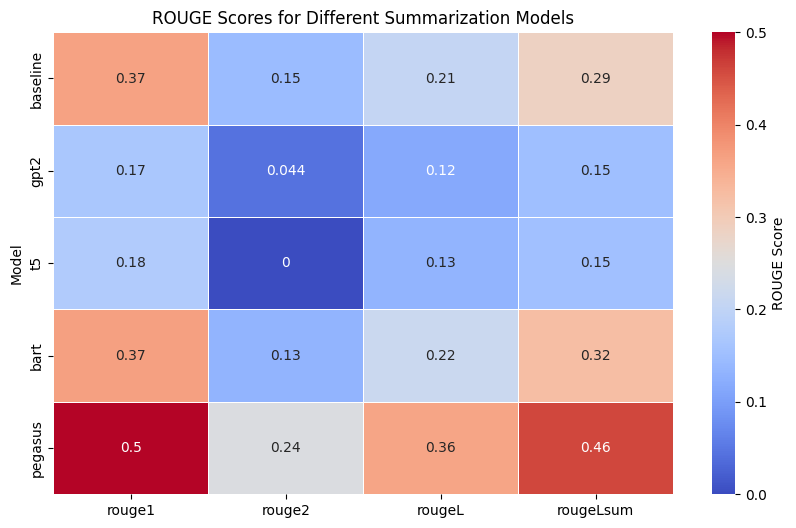

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    'Model': ['baseline', 'gpt2', 't5', 'bart', 'pegasus'],
    'rouge1': [0.365079, 0.166667, 0.175824, 0.365591, 0.5],
    'rouge2': [0.145161, 0.043796, 0.0, 0.131868, 0.244898],
    'rougeL': [0.206349, 0.115942, 0.131868, 0.215054, 0.36],
    'rougeLsum': [0.285714, 0.152174, 0.153846, 0.322581, 0.46],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the 'Model' column as the index
df.set_index('Model', inplace=True)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=0.5, cbar_kws={'label': 'ROUGE Score'})
plt.title('ROUGE Scores for Different Summarization Models')
plt.show()


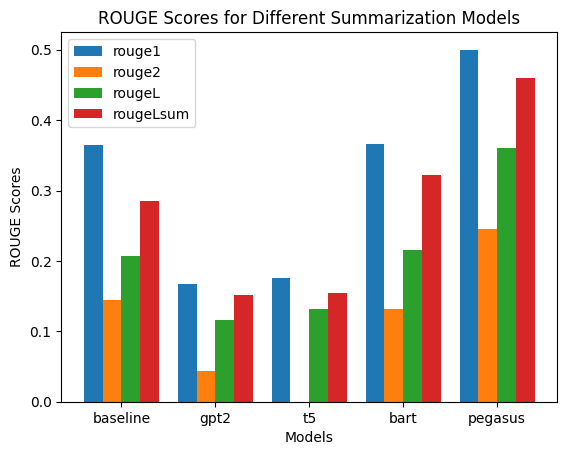

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['baseline', 'gpt2', 't5', 'bart', 'pegasus']
rouge1_scores = [0.365079, 0.166667, 0.175824, 0.365591, 0.5]
rouge2_scores = [0.145161, 0.043796, 0.0, 0.131868, 0.244898]
rougeL_scores = [0.206349, 0.115942, 0.131868, 0.215054, 0.36]
rougeLsum_scores = [0.285714, 0.152174, 0.153846, 0.322581, 0.46]

# Create subplots
fig, ax = plt.subplots()

# Bar width
width = 0.2

# Bar positions
x = np.arange(len(models))

# Create bars for each metric
plt.bar(x - 3 * width/2, rouge1_scores, width=width, label='rouge1')
plt.bar(x - width/2, rouge2_scores, width=width, label='rouge2')
plt.bar(x + width/2, rougeL_scores, width=width, label='rougeL')
plt.bar(x + 3 * width/2, rougeLsum_scores, width=width, label='rougeLsum')

# X-axis labels
plt.xticks(x, models)
plt.xlabel('Models')

# Y-axis label
plt.ylabel('ROUGE Scores')

# Legend
plt.legend()

# Title
plt.title('ROUGE Scores for Different Summarization Models')

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame from the ROUGE scores
data = {
    'baseline': [0.365079, 0.145161, 0.206349, 0.285714],
    'gpt2': [0.166667, 0.043796, 0.115942, 0.152174],
    't5': [0.175824, 0.000000, 0.131868, 0.153846],
    'bart': [0.365591, 0.131868, 0.215054, 0.322581],
    'pegasus': [0.5, 0.244898, 0.36, 0.46]
}

df = pd.DataFrame(data, index=['rouge1', 'rouge2', 'rougeL', 'rougeLsum'])

# Calculate mean, median, and standard deviation
mean_scores = df.mean(axis=1)
median_scores = df.median(axis=1)
std_dev_scores = df.std(axis=1)

# Print the results
print("Mean Scores:")
print(mean_scores)
print("\nMedian Scores:")
print(median_scores)
print("\nStandard Deviation:")
print(std_dev_scores)


Mean Scores:
rouge1       0.314632
rouge2       0.113145
rougeL       0.205843
rougeLsum    0.274863
dtype: float64

Median Scores:
rouge1       0.365079
rouge2       0.131868
rougeL       0.206349
rougeLsum    0.285714
dtype: float64

Standard Deviation:
rouge1       0.142007
rouge2       0.095322
rougeL       0.096701
rougeLsum    0.128810
dtype: float64


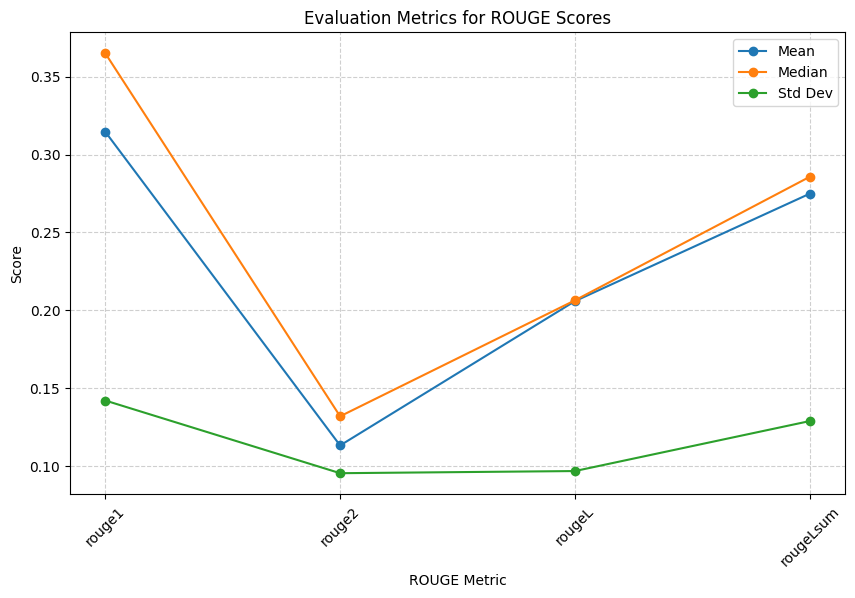

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the ROUGE scores
data = {
    'baseline': [0.365079, 0.145161, 0.206349, 0.285714],
    'gpt2': [0.166667, 0.043796, 0.115942, 0.152174],
    't5': [0.175824, 0.000000, 0.131868, 0.153846],
    'bart': [0.365591, 0.131868, 0.215054, 0.322581],
    'pegasus': [0.5, 0.244898, 0.36, 0.46]
}

df = pd.DataFrame(data, index=['rouge1', 'rouge2', 'rougeL', 'rougeLsum'])

# Calculate mean, median, and standard deviation
mean_scores = df.mean(axis=1)
median_scores = df.median(axis=1)
std_dev_scores = df.std(axis=1)

# Plot the graph
metrics = ['Mean', 'Median', 'Std Dev']

plt.figure(figsize=(10, 6))

for metric in metrics:
    if metric == 'Mean':
        plt.plot(mean_scores, marker='o', label=metric)
    elif metric == 'Median':
        plt.plot(median_scores, marker='o', label=metric)
    elif metric == 'Std Dev':
        plt.plot(std_dev_scores, marker='o', label=metric)

plt.title('Evaluation Metrics for ROUGE Scores')
plt.xlabel('ROUGE Metric')
plt.xticks(rotation=45)
plt.ylabel('Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization", model="t5-base", tokenizer="t5-base", framework="tf")

input_text = "The US has passed the peak on new coronavirus cases, President Donald Trump said and predicted that some states would reopen this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. We'll be the comeback kids, all of us, he said. We want to get our country back. The Trump administration has previously fixed May 1 as a possible date to reopen the world's largest economy, but the president said some states may be able to return to normalcy earlier than that."

# Generate the first summary
summary1 = summarizer(input_text, min_length=25, max_length=100)[0]["summary_text"]

# Generate the second summary with different settings
summary2 = summarizer(input_text, min_length=50, max_length=150)[0]["summary_text"]

print("Summary 1:", summary1)
print("Summary 2:", summary2)


All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


/usr/local/lib/python3.10/dist-packages/transformers/models/t5/tokenization_t5_fast.py:158: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


Summary 1: the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths . the president says new guidelines to reopen the country will be announced on thursday .
Summary 2: the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths . the president says new guidelines to reopen the country will be announced on tuesday . he said some states may be able to return to normalcy earlier than that .


In [ ]:
from rouge_score import rouge_scorer

# Your generated summaries
summary1 = "the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths . the president says new guidelines to reopen the country will be announced on thursday."
summary2 = "the US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths . the president says new guidelines to reopen the country will be announced on tuesday . he said some states may be able to return to normalcy earlier than that"

# Reference summary (if available)
reference = "President Donald Trump announced that the US has passed the peak of new coronavirus cases and predicted that some states would reopen this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world . New guidelines to reopen the country would be announced on Thursday after he speaks to governors . The Trump administration has previously fixed May 1 as a possible date to reopen the world’s largest economy, but the president said some states may be able to return to normalcy earlier than that . We’ll be the comeback kids, all of us, he said. We want to get our country back ."

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores for summary 1
scores1 = scorer.score(summary1, reference)

# Calculate ROUGE scores for summary 2
scores2 = scorer.score(summary2, reference)

# Print ROUGE scores for summary 1
print("ROUGE Scores for Summary 1:")
print(scores1)

# Print ROUGE scores for summary 2
print("ROUGE Scores for Summary 2:")
print(scores2)

ROUGE Scores for Summary 1:
{'rouge1': Score(precision=0.23275862068965517, recall=0.9310344827586207, fmeasure=0.3724137931034483), 'rouge2': Score(precision=0.20869565217391303, recall=0.8571428571428571, fmeasure=0.3356643356643356), 'rougeL': Score(precision=0.22413793103448276, recall=0.896551724137931, fmeasure=0.35862068965517246)}
ROUGE Scores for Summary 2:
{'rouge1': Score(precision=0.3448275862068966, recall=0.9302325581395349, fmeasure=0.5031446540880503), 'rouge2': Score(precision=0.3130434782608696, recall=0.8571428571428571, fmeasure=0.4585987261146497), 'rougeL': Score(precision=0.33620689655172414, recall=0.9069767441860465, fmeasure=0.49056603773584906)}


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Initialize the BART model and tokenizer
model_name = "facebook/bart-large-cnn"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Initialize the summarization pipeline
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)

# Define the input text
input_text = """
The US has passed the peak on new coronavirus cases, President Donald Trump said and predicted that some states would reopen this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. We'll be the comeback kids, all of us, he said. We want to get our country back. The Trump administration has previously fixed May 1 as a possible date to reopen the world's largest economy, but the president said some states may be able to return to normalcy earlier than that.
"""

# Generate two summaries
summary1 = summarizer(input_text, max_length=100, min_length=25, do_sample=False)[0]["summary_text"]
summary2 = summarizer(input_text, max_length=150, min_length=50, do_sample=False)[0]["summary_text"]

# Print the two summaries
print("Summary 1:")
print(summary1)

print("\nSummary 2:")
print(summary2)


Summary 1:
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. Trump said new guidelines to reopen the country would be announced on Thursday.

Summary 2:
The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors.


In [ ]:
from rouge_score import rouge_scorer

# Your generated summaries
summary1 = "The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. Trump said new guidelines to reopen the country would be announced on Thursday."
summary2 = "The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors."

# Reference summary (if available)
reference = "President Donald Trump announced that the US has passed the peak of new coronavirus cases and predicted that some states would reopen this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world . New guidelines to reopen the country would be announced on Thursday after he speaks to governors . The Trump administration has previously fixed May 1 as a possible date to reopen the world’s largest economy, but the president said some states may be able to return to normalcy earlier than that . We’ll be the comeback kids, all of us, he said. We want to get our country back ."

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores for summary 1
scores1 = scorer.score(summary1, reference)

# Calculate ROUGE scores for summary 2
scores2 = scorer.score(summary2, reference)

# Print ROUGE scores for summary 1
print("ROUGE Scores for Summary 1:")
print(scores1)

# Print ROUGE scores for summary 2
print("ROUGE Scores for Summary 2:")
print(scores2)

ROUGE Scores for Summary 1:
{'rouge1': Score(precision=0.3103448275862069, recall=1.0, fmeasure=0.4736842105263158), 'rouge2': Score(precision=0.2782608695652174, recall=0.9142857142857143, fmeasure=0.4266666666666667), 'rougeL': Score(precision=0.29310344827586204, recall=0.9444444444444444, fmeasure=0.44736842105263147)}
ROUGE Scores for Summary 2:
{'rouge1': Score(precision=0.35344827586206895, recall=1.0, fmeasure=0.5222929936305732), 'rouge2': Score(precision=0.3217391304347826, recall=0.925, fmeasure=0.4774193548387097), 'rougeL': Score(precision=0.33620689655172414, recall=0.9512195121951219, fmeasure=0.4968152866242038)}


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

# Initialize the GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Initialize the text generation pipeline
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer)

# Define the input text
input_text = """
The US has passed the peak on new coronavirus cases, President Donald Trump said and predicted that some states would reopen this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. We'll be the comeback kids, all of us, he said. We want to get our country back. The Trump administration has previously fixed May 1 as a possible date to reopen the world's largest economy, but the president said some states may be able to return to normalcy earlier than that.
"""

# Generate two summaries
summary1 = text_generator(input_text, max_length=100, min_length=25, do_sample=False)[0]["generated_text"]
summary2 = text_generator(input_text, max_length=200, min_length=75, do_sample=False)[0]["generated_text"]

# Print the two summaries
print("Summary 1:")
print(summary1)

print("\nSummary 2:")
print(summary2)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 151, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Summary 1:

The US has passed the peak on new coronavirus cases, President Donald Trump said and predicted that some states would reopen this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. We'll be the comeback kids, all of us, he said. We want to get our country back. The Trump administration has previously fixed May 1 as a possible date to reopen the world's largest economy, but the president said some states may be able to return to normalcy earlier than that.



Summary 2:

The US has passed the peak on new coronavirus cases, President Donald Trump said and predicted that some states would reopen this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. At the daily White Ho

In [ ]:
from rouge_score import rouge_scorer

# Your generated summaries
summary1 = "The US has passed the peak on new coronavirus cases, President Donald Trump said and predicted that some states would reopen this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. We'll be the comeback kids, all of us, he said. We want to get our country back. The Trump administration has previously fixed May 1 as a possible date to reopen the world's largest economy, but the president said some states may be able to return to normalcy earlier than that."
summary2 = '''The US has passed the peak on new coronavirus cases, President Donald Trump said and predicted that some states would reopen
        this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world. At the daily White House coronavirus briefing on Wednesday, Trump said new guidelines to reopen the country would be announced on Thursday after he speaks to governors. We'll be the comeback kids, all of us, he said. We want to get our country back. The Trump administration has previously fixed May 1 as a possible date to reopen the world's largest economy, but the president said some states may be able to return to normalcy earlier than that. We're going to be the comeback kids, all of us, we want to get our country back, Trump said. We want to get our country back. The Trump administration has previously fixed May 1 as a possible date to reopen'''

# Reference summary (if available)
reference = "President Donald Trump announced that the US has passed the peak of new coronavirus cases and predicted that some states would reopen this month. The US has over 637,000 confirmed Covid-19 cases and over 30,826 deaths, the highest for any country in the world . New guidelines to reopen the country would be announced on Thursday after he speaks to governors . The Trump administration has previously fixed May 1 as a possible date to reopen the world’s largest economy, but the president said some states may be able to return to normalcy earlier than that . We’ll be the comeback kids, all of us, he said. We want to get our country back ."

# Initialize the ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores for summary 1
scores1 = scorer.score(summary1, reference)

# Calculate ROUGE scores for summary 2
scores2 = scorer.score(summary2, reference)

# Print ROUGE scores for summary 1
print("ROUGE Scores for Summary 1:")
print(scores1)

# Print ROUGE scores for summary 2
print("ROUGE Scores for Summary 2:")
print(scores2)

ROUGE Scores for Summary 1:
{'rouge1': Score(precision=0.9741379310344828, recall=0.8968253968253969, fmeasure=0.9338842975206612), 'rouge2': Score(precision=0.9217391304347826, recall=0.848, fmeasure=0.8833333333333334), 'rougeL': Score(precision=0.7931034482758621, recall=0.7301587301587301, fmeasure=0.7603305785123967)}
ROUGE Scores for Summary 2:
{'rouge1': Score(precision=0.9827586206896551, recall=0.6826347305389222, fmeasure=0.8056537102473499), 'rouge2': Score(precision=0.9304347826086956, recall=0.6445783132530121, fmeasure=0.7615658362989324), 'rougeL': Score(precision=0.9310344827586207, recall=0.6467065868263473, fmeasure=0.7632508833922261)}
